In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [63]:
df.shape

(200000, 9)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [65]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [66]:
df = df.dropna()  # Dropping rows with missing values for simplicity

In [67]:
# Convert the 'pickup_datetime' column to datetime format to enable time-based operations
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [68]:
df['pickup_datetime']

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 199999, dtype: object

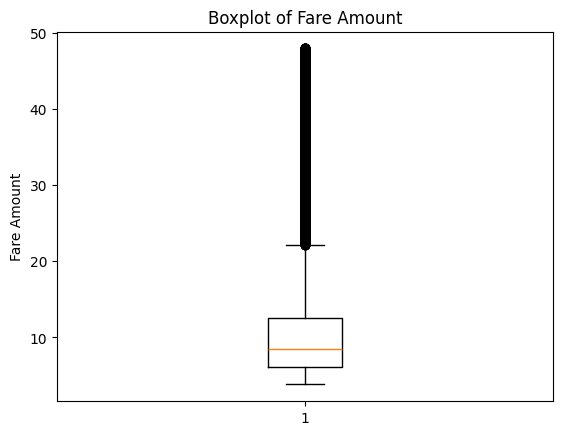

In [69]:
# Plot a boxplot for the 'fare_amount' column to visualize outliers
plt.boxplot(data['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.ylabel('Fare Amount')
plt.show()

In [70]:
# Define the lower and upper quantiles to identify outliers
q_low = df["fare_amount"].quantile(0.01)  # 1st percentile
q_hi = df["fare_amount"].quantile(0.99)   # 99th percentile

# Filter the dataset to keep only the values within the specified quantile range
# This removes extreme outliers below the 1st and above the 99th percentile
data = df[(df["fare_amount"] > q_low) & (df["fare_amount"] < q_hi)]

In [71]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [72]:
#Take x as predictor variable
X = df.drop("fare_amount", axis = 1)
#And y as target variable
Y = df['fare_amount']

In [73]:
# Convert the 'pickup_datetime' column to a numeric format
# This is necessary for modeling since machine learning algorithms typically require numerical input
X['pickup_datetime'] = pd.to_numeric(pd.to_datetime(X['pickup_datetime']))

# Select columns from the DataFrame 'X' that have names starting with 'Unnamed'
# This is useful for filtering out any columns that might have been automatically created 
# (for example, due to an index in a CSV file) and may not contain useful information
X = X.loc[:, X.columns.str.contains('^Unnamed')]


In [59]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X,  # Features (input variables)
    Y,  # Target variable (output variable)
    test_size=0.2,  # Proportion of the dataset to include in the test split (20% for testing)
    random_state=1  # Seed used by the random number generator for reproducibility
)

In [75]:
# Create an instance of the LinearRegression model
lrmodel = LinearRegression()

# Fit the Linear Regression model to the training data
# X_train contains the input features, and Y_train contains the target variable
lrmodel.fit(X_train, Y_train)


LinearRegression()

In [76]:
# Use the trained Linear Regression model to make predictions on the test set
# X_test contains the input features for which we want to predict the target variable
Y_pred_lrmodel = lrmodel.predict(X_test)


In [77]:
# Import the mean_squared_error function from the sklearn.metrics module
from sklearn.metrics import mean_squared_error

# Calculate the Root Mean Squared Error (RMSE) for the predictions made by the linear regression model
# mean_squared_error computes the mean squared error between actual and predicted values
# We use Y_test (the actual values) and Y_pred_lrmodel (the predicted values) as inputs
lrmodelrmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lrmodel))

print("RMSE error for the model is ", lrmodelrmse)


RMSE error for the model is  8.063863046328835


In [79]:
# Initialize a Random Forest Regressor model
# n_estimators: The number of trees in the forest. More trees can improve accuracy but also increase computational cost.
# random_state: A seed for the random number generator to ensure reproducibility of results. 
# Setting it to a specific integer allows you to get the same results every time you run the code.
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
# Fit the Random Forest Regressor model to the training data
# The fit method trains the model using the features (X_train) and the target variable (Y_train)
rfrmodel.fit(X_train, Y_train)

# Predict the target variable for the test dataset
# The predict method uses the trained model to make predictions based on the features in the test set (X_test)
rfrmodel_pred = rfrmodel.predict(X_test)


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) for the Random Forest Regressor model
# mean_squared_error computes the average of the squared differences between the predicted and actual values
# np.sqrt takes the square root of that average to obtain the RMSE
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, Y_test))

print("RMSE value for Random Forest is:",rfrmodel_rmse)